<a href="https://colab.research.google.com/github/xinhe-zhang/heatwave/blob/main/HW4_%E5%BC%B5%E6%98%95%E8%8D%B7_R12228016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IPCS Heatwave HW4:
**Thermofeel**


**Reference:**

https://github.com/ecmwf-projects/thermofeel

Brimicombe C,Di Napoli C, Quintino T,Pappenberger F, Cornforth R and Cloke H,2022 thermofeel: a python thermal comfort indices library Software X https://doi.org/10.1016/j.softx.2022.101005


https://pypi.org/project/thermofeel/



Level 1: Calculate UTCI and repeat HW1. Compare two difference.


In [3]:
!pip install pythermalcomfort
!pip install cartopy
from pythermalcomfort import models
import xarray as xr
!pip install netCDF4
import netCDF4 as nc4
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import numpy as np
import matplotlib.dates as mdates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#Download ERA5 Tmax, 1979-2022,  144*73
#https://drive.google.com/file/d/1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn/view?usp=sharing
!gdown 1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn
To: /content/ERA5_SFC_mx2t_1979-2022_r144x73_day.nc
100% 676M/676M [00:04<00:00, 152MB/s]


In [5]:
filename ='ERA5_SFC_mx2t_1979-2022_r144x73_day.nc'
ds_mx2t = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

In [6]:
#Write the time format
ds_mx2t['time'] = ds_mx2t['time'].astype('datetime64[ns]')
print(ds_mx2t['time'].dtype)
print(ds_mx2t['time'])

start_date = np.datetime64('1979-01-01')
end_date = np.datetime64('2023-01-01')  # Adjust the end date as needed

# Create a time array with intervals of 1 day
time_array = np.arange(start_date, end_date, np.timedelta64(1, 'D'))

print(time_array)
ds_mx2t['time'] = time_array

datetime64[ns]
<xarray.DataArray 'time' (time: 16071)>
array(['1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', ..., '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-01 ... 1970-01-01
Attributes:
    standard_name:  time
    long_name:      Date
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T
['1979-01-01' '1979-01-02' '1979-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

In [7]:
ds_mx2t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

<xarray.Dataset>
Dimensions:  (time: 16071, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    mx2t     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [8]:
# Convert Kelvin to Celsius
ds_mx2t = ds_mx2t - 273.15

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

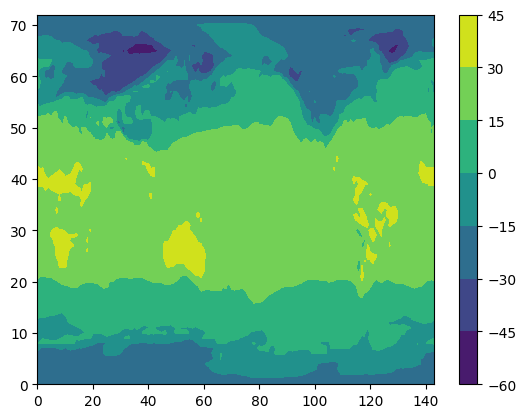

In [9]:
plt.contourf(ds_mx2t['mx2t'][0,:,:])
plt.colorbar()

In [10]:
#Select the month and location
my_mx2t = ds_mx2t.sel(time=ds_mx2t.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [11]:
my_mx2t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lon      float64 130.0
    lat      float64 67.5
Data variables:
    mx2t     (time) float32 2.673 0.3972 1.433 2.862 ... 1.211 5.655 14.04 13.57
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [12]:
#Download ERA5 RH, 1979-2022, 144*73
#https://drive.google.com/file/d/1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY/view?usp=sharing
!gdown 1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY
To: /content/ERA5_SFC_rh_1979-2022_r144x73_day.nc
100% 676M/676M [00:10<00:00, 66.5MB/s]


In [13]:
filename ='ERA5_SFC_rh_1979-2022_r144x73_day.nc'
ds_rh = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Write the time format
ds_rh['time'] = ds_rh['time'].astype('datetime64[ns]')
ds_rh['time'] = time_array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
ds_rh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 16071, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    rh       (time, lat, lon) float32 ...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


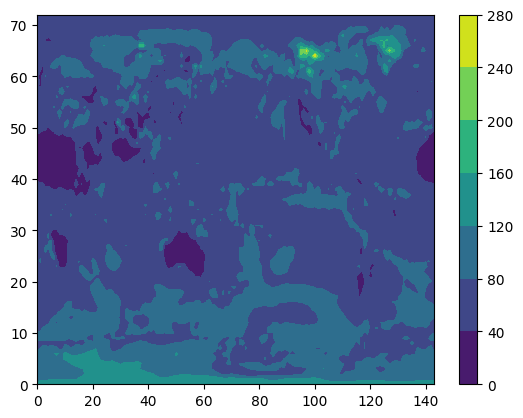

In [16]:
plt.contourf(ds_rh['rh'][0,:,:])
plt.colorbar()

In [17]:
#Select the month and location
my_rh = ds_rh.sel(time=ds_mx2t.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [18]:
my_rh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lat      float64 67.5
    lon      float64 130.0
Data variables:
    rh       (time) float32 ...

In [19]:
#Download ERA5 wspd(wind speed), 1979-2022, 144*73
#https://drive.google.com/file/d/149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2/view?usp=sharing
!gdown 149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2
To: /content/ERA5_SFC_wspd_1979-2022_r144x73_day.nc
100% 676M/676M [00:11<00:00, 59.3MB/s]


In [20]:
filename ='ERA5_SFC_wspd_1979-2022_r144x73_day.nc'
ds_wspd = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#Write the time format
ds_wspd['time'] = ds_wspd['time'].astype('datetime64[ns]')
ds_wspd['time'] = time_array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
print(ds_wspd['wspd'])

<xarray.DataArray 'wspd' (time: 16071, lat: 73, lon: 144)>
[168938352 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    cell_methods:   time: mean
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
    level:          1000.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


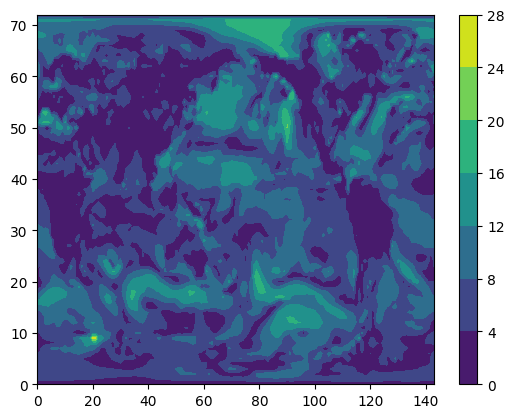

In [23]:
plt.contourf(ds_wspd['wspd'][0,:,:])
plt.colorbar()

In [24]:
#Select the month and location
my_wspd = ds_wspd.sel(time=ds_wspd.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [25]:
print(my_wspd)

<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lat      float64 67.5
    lon      float64 130.0
Data variables:
    wspd     (time) float32 ...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def xutci(tbr, tr, v, rh):
    return xr.apply_ufunc(
        models.utci,
        tbr,
        tr,
        v,
        rh,
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
rh = my_rh['rh']
t = my_mx2t['mx2t']
wspd = my_wspd['wspd']
my_utci = xutci(t, t, wspd, rh)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#filter 2020 tmax
my_mx2t_2020 = my_mx2t.sel(time=slice('2020-06-01', '2020-06-30'))
print(my_mx2t_2020)
#now we got data only in the 30 days in June, 2020

<xarray.Dataset>
Dimensions:  (time: 30)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5
Data variables:
    mx2t     (time) float32 9.526 10.94 9.943 7.004 ... 25.26 24.78 20.81 23.3
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
my_mx2t_2020['mx2t']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'mx2t' (time: 30)>
array([ 9.525879 , 10.940521 ,  9.943268 ,  7.0035706, 12.126099 ,
       16.367584 , 18.905792 , 19.417328 , 14.270233 ,  3.7114868,
       11.85788  , 14.485016 , 15.052765 , 19.041107 , 16.863617 ,
       18.66867  , 20.802094 , 22.38266  , 24.947235 , 27.151031 ,
       28.141815 , 25.965271 , 26.225433 , 26.054504 , 25.74002  ,
       24.923676 , 25.255829 , 24.777466 , 20.811737 , 23.30014  ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5

In [30]:
#filter 2020 June utci
my_utci_2020 = my_utci.sel(time=slice('2020-06-01', '2020-06-30'))
print(my_utci_2020)
#now we got data only in the 30 days in June, 2020

<xarray.DataArray (time: 30)>
array([ 8.4, 10.7,  7.7,  5.8, 11.4, 15.9, 17.7, 18.4,  8.7,  3. ,  9.4,
       11.6, 13.4, 16.1, 11.8, 13.6, 18.7, 21.5, 23.5, 26.1, 26.6, 24.8,
       25.5,  nan, 24.8, 24.5, 24.6, 23.8, 18.9, 22. ])
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


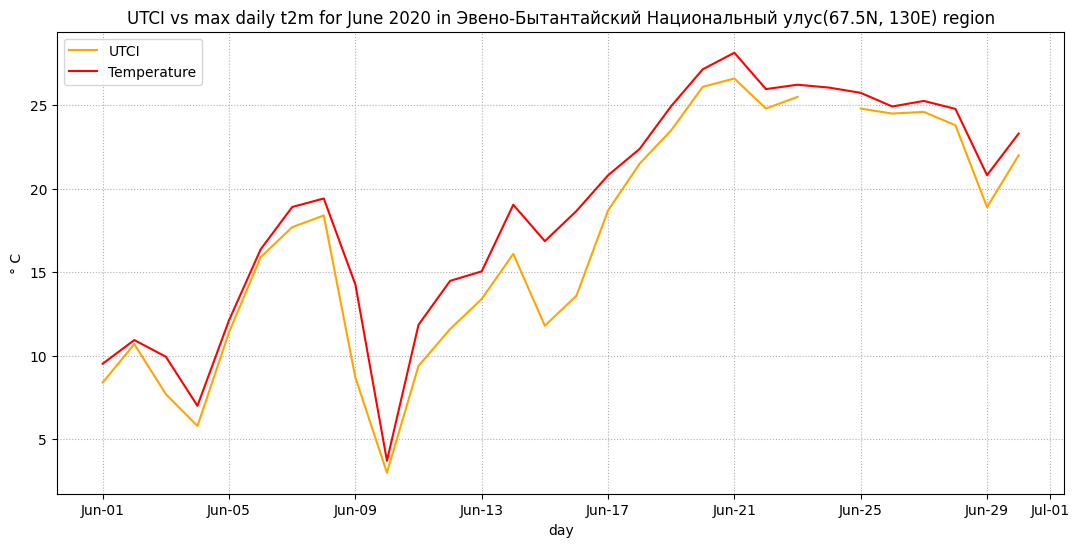

In [44]:
#a line plot that shows utci fluctuation in June, 2002
fig, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.plot(my_utci_2020.time, my_utci_2020, color = "orange", label='UTCI')
ax.plot(my_mx2t_2020.time, my_mx2t_2020['mx2t'], color = "red", label='Temperature')
ax.set_title('UTCI vs max daily t2m for June 2020 in Эвено-Бытантайский Национальный улус(67.5N, 130E) region')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='dotted')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left')

**Fig.1**
*This plot shows the variation of UTCI (there is one NA value on 24th June) and maximum temperature at 2m in June 2020 at the location (67.5N, 130E).The trends are similar for the two variables. However, in this case, the UTCI is slightly lower than the air temperature.*

In [33]:
#select mx2t before 2020(included)
mx2t_past = my_mx2t['mx2t'].loc['1979':'2020']
print(mx2t_past)

<xarray.DataArray 'mx2t' (time: 1260)>
array([ 2.6732178 ,  0.39715576,  1.433136  , ..., 24.777466  ,
       20.811737  , 23.30014   ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#select 10, 50, 90 quantile from the past
mx2t_max_mid = mx2t_past.groupby('time.day').quantile(0.5)
mx2t_max_90  = mx2t_past.groupby('time.day').quantile(0.9)
mx2t_max_10  = mx2t_past.groupby('time.day').quantile(0.1)
print(mx2t_max_10)
print(mx2t_max_mid)
print(mx2t_max_90)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'mx2t' (day: 30)>
array([ 1.26698303, -0.09563599,  1.47315979,  2.10023804,  2.53217163,
        1.55690002,  2.51426392,  2.14571838,  2.75400391,  4.51462708,
        4.51018677,  2.24583435,  5.57673035,  5.69622192,  3.90957642,
        6.54688721,  7.68616638,  6.05609741,  5.04045715,  5.16160889,
        4.40421448,  3.99577026,  4.86681213,  6.4004425 ,  7.26490784,
        7.31978455,  8.03847961,  9.05471497,  7.40127869,  9.04939575])
Coordinates:
    quantile  float64 0.1
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray 'mx2t' (day: 30)>
array([ 7.7645874 ,  7.79483032,  9.07383728,  7.9112854 ,  8.03172302,
        9.98014832,  9.47103882, 10.50602722, 11.3681488 , 11.00364685,
       11.26649475, 13.46394348, 13.24005127, 12.95986938, 12.92799377,
       13.46987915, 14.81951904, 14.9394989 , 14.83474731, 13.76452637,
       14.03843689, 12.8120575 , 12.37139893, 14.28312683, 13.42919922,
       13.80627

In [35]:
#select UTCI before 2020(included)
utci_past = my_utci.loc['1979':'2020']
print(utci_past)

<xarray.DataArray (time: 1260)>
array([-0.2, -3. ,  0.1, ..., 23.8, 18.9, 22. ])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#select 10, 50, 90 quantile from the past
utci_max_mid = utci_past.groupby('time.day').quantile(0.5)
utci_max_90  = utci_past.groupby('time.day').quantile(0.9)
utci_max_10  = utci_past.groupby('time.day').quantile(0.1)
print(utci_max_10)
print(utci_max_mid)
print(utci_max_90)

<xarray.DataArray (day: 30)>
array([-4.3 , -5.7 , -0.41, -2.24, -4.9 , -1.72, -1.9 , -1.39, -0.22,
        2.6 ,  1.2 , -2.62,  3.39,  2.25, -2.14,  2.73,  4.24,  0.57,
        1.37, -1.38, -1.36, -2.1 ,  0.5 ,  3.68,  0.8 ,  2.1 ,  4.77,
        6.16,  2.89,  5.1 ])
Coordinates:
    quantile  float64 0.1
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray (day: 30)>
array([ 5.9 ,  4.8 ,  5.7 ,  4.2 ,  7.  ,  7.55,  7.8 ,  8.1 ,  8.5 ,
       10.  ,  8.7 ,  9.4 , 11.3 , 10.55, 10.35,  9.7 , 11.5 , 12.35,
       12.25, 10.6 , 11.25,  9.8 , 11.5 , 10.7 , 12.6 , 11.9 , 13.3 ,
       14.1 , 13.1 , 13.3 ])
Coordinates:
    quantile  float64 0.5
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray (day: 30)>
array([ 9.  , 13.3 , 12.83, 12.1 , 15.9 , 16.25, 16.6 , 17.  , 16.25,
       15.6 , 15.9 , 17.04, 16.43, 17.12, 18.24, 18.76, 18.9 , 18.83,
       20.14, 19.92, 18.95, 20.3 , 22.2 , 20.06, 21.5 ,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this wil

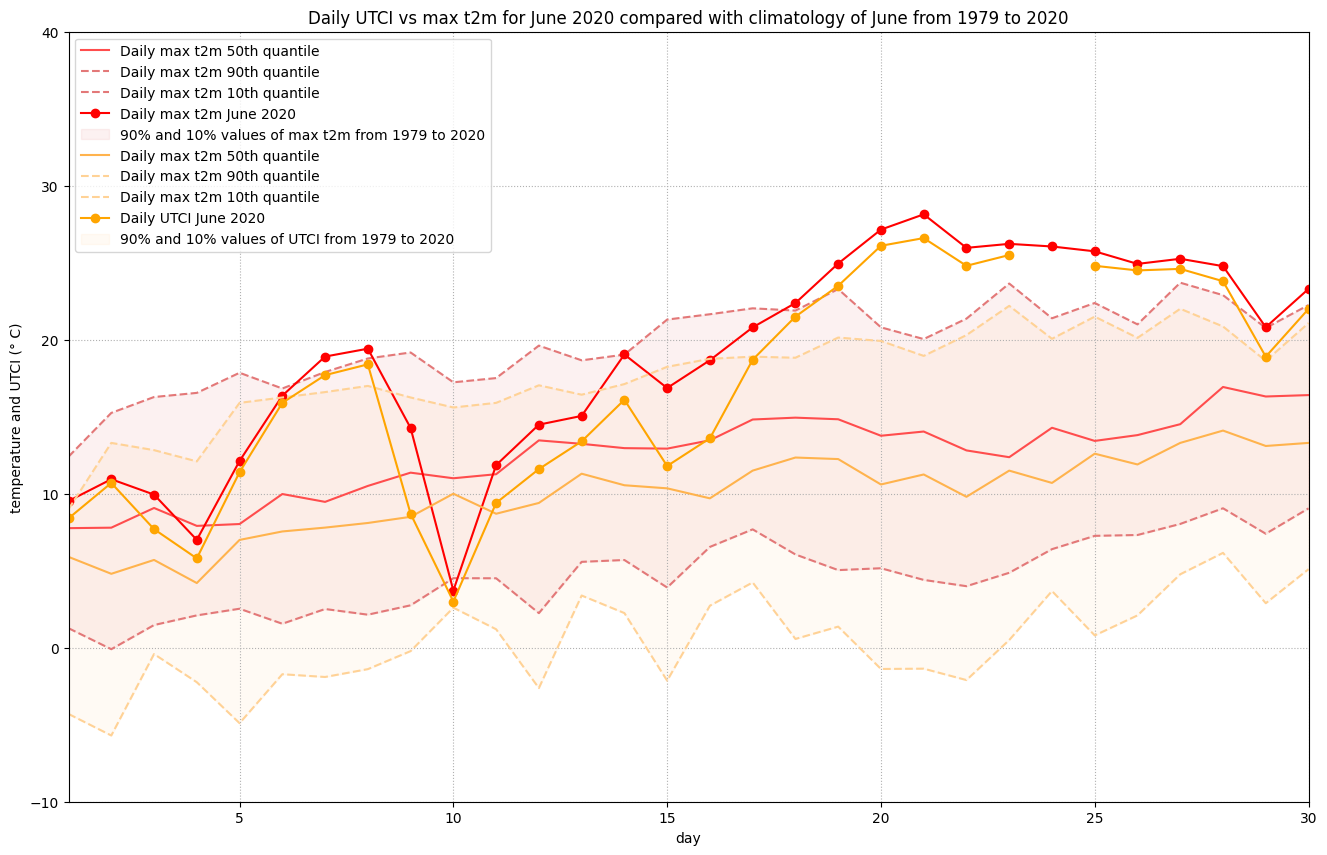

In [46]:
fig = plt.figure(figsize=(16,10))
ax = plt.subplot()

ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_mid, color='#FF4D4D', label='Daily max t2m 50th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_90, color='#E37878', ls='--', label='Daily max t2m 90th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_10, color='#E37878', ls='--', label='Daily max t2m 10th quantile')
ax.plot(my_mx2t_2020.time.dt.day, my_mx2t_2020['mx2t'], 'bo-', color='red', label='Daily max t2m June 2020')
ax.fill_between(my_mx2t_2020.time.dt.day, mx2t_max_90, mx2t_max_10, alpha=0.1,
                label='90% and 10% values of max t2m from 1979 to 2020', color = '#E37878')

ax.plot(my_utci_2020.time.dt.day, utci_max_mid, color='#FFB34D', label='Daily max t2m 50th quantile')
ax.plot(my_utci_2020.time.dt.day, utci_max_90, color='#FFD296', ls='--', label='Daily max t2m 90th quantile')
ax.plot(my_utci_2020.time.dt.day, utci_max_10, color='#FFD296', ls='--', label='Daily max t2m 10th quantile')
ax.plot(my_utci_2020.time.dt.day, my_utci_2020, 'bo-', color='orange', label='Daily UTCI June 2020')
ax.fill_between(my_utci_2020.time.dt.day, utci_max_90, utci_max_10, alpha=0.1,
                label='90% and 10% values of UTCI from 1979 to 2020', color = '#FFD296')

ax.set_xlim(1,30)
ax.set_ylim(-10,40)
ax.set_title('Daily UTCI vs max t2m for June 2020 compared with climatology of June from 1979 to 2020')
ax.set_ylabel('temperature and UTCI (° C)')
ax.set_xlabel('day')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='dotted')

**Fig.2**
*The plot shows the historical UTCI and temperature range of June for this location from 1979 to June 2020, with the upper and lower bounds corresponding to the 90th and 10th quantiles, respectively. The UTCI is continuously lower than the temperature in each quantile, with the distance between lower boundaries larger than that between upper boundaries.*

In [38]:
#selct only mx2t on 21 June
mx2t_21 = my_mx2t['mx2t'][20::30] #start from index 20, for an interval of 30
print(mx2t_21)

<xarray.DataArray 'mx2t' (time: 44)>
array([ 7.522766 ,  8.411041 ,  1.9347229, 11.865509 , 14.327301 ,
       18.43863  , 10.553589 , 23.109161 ,  5.2833557, 15.658905 ,
        6.587158 , 15.538025 ,  4.2362976, 18.713165 , 14.150269 ,
       11.582001 , 13.834351 ,  4.345337 , 16.577393 , 22.337006 ,
       12.717163 ,  4.3958435,  9.413971 , 20.075287 ,  6.4478455,
        4.193512 , 17.294495 ,  9.981567 , 18.775085 , 16.57373  ,
       17.809265 , 13.926605 , 13.901184 ,  4.479553 , 16.964386 ,
       18.156647 , 14.956726 , 12.004974 , 16.299164 , 19.748383 ,
       23.049805 , 28.141815 , 26.396942 , 16.012604 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-21 1980-06-21 ... 2022-06-21
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#selct only UTCI on 21 June
utci_21 = my_utci[20::30] #start from index 20, for an interval of 30
print(utci_21)

<xarray.DataArray (time: 44)>
array([ 3.6,  6.5, -7.2, 11. , 13.3, 14.7, 10.4, 19. ,  1.4, 11.2,  1.9,
       10.1, -2.9, 17.6, 10.9,  8.9, 14. , -0.1, 15.1, 21.1, 11.3, -2.6,
       -1.9, 18.5,  2.3, -1.5, 15.2,  9.1, 17.1, 15.3, 13.8, 10.5, 14.4,
        2.7, 14.7, 18.3, 11.3,  9.4, 13.1, 19. , 21.5, 26.6, 24.3, 13.8])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-21 1980-06-21 ... 2022-06-21
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


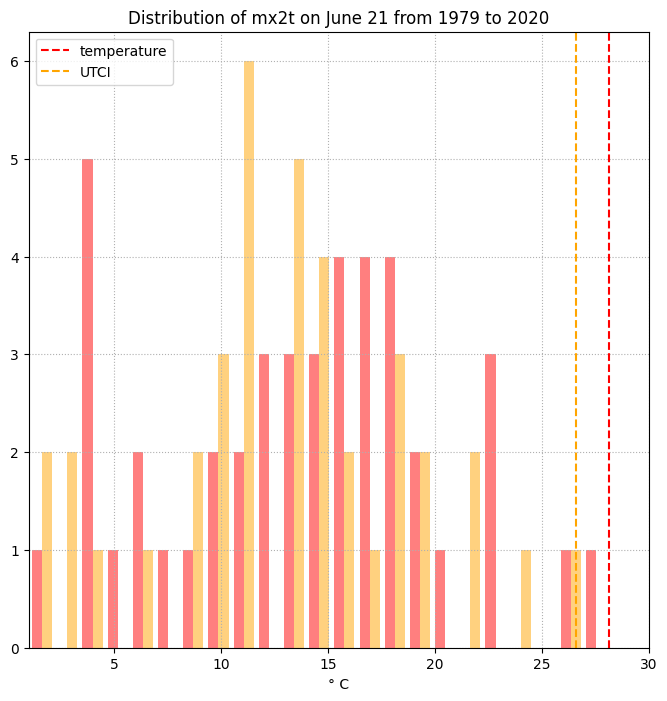

In [55]:
#plot the probability distribution
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.hist([mx2t_21, utci_21], color=['red', 'orange'], bins=30, alpha = 0.5)
ax.set_xlim(1,30)
ax.set_title('Distribution of mx2t on June 21 from 1979 to 2020')
plt.axvline(x = my_mx2t_2020['mx2t'].max(), color = 'red', label = 'temperature', linestyle='--')
plt.axvline(x = my_utci_2020.max(), color = 'orange', label = 'UTCI', linestyle='--')
ax.set_xlabel('° C')
ax.grid(linestyle='dotted')
ax.legend()

**Fig.3**
*The plot shows the distribution of history value of UTCI and the temperature on 21st June from 1979-2020. The UTCI is more right-skewed than the temperature and has a more-concentrated distribution, centered around 10-15 ° C, indicating its overall value is lower the temperature. The dashed lines indicate the maximum UTCI/temperaure during the heatwave event -- in both UTCI and temperaure, the maximum value is at the far right end of the distribution. It can be reffered that it was an extreme case for both indices.*

In [50]:
years = np.arange(44) #2022-1979=43 years
days_in_jun = np.arange(17,24)
index = np.zeros(308) #44*7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
#calculate the index that marks those days
for i in years:
    index[i*7:(i*7)+7] = days_in_jun + (i*30)
index = index.astype(int)
print(index)

[  17   18   19   20   21   22   23   47   48   49   50   51   52   53
   77   78   79   80   81   82   83  107  108  109  110  111  112  113
  137  138  139  140  141  142  143  167  168  169  170  171  172  173
  197  198  199  200  201  202  203  227  228  229  230  231  232  233
  257  258  259  260  261  262  263  287  288  289  290  291  292  293
  317  318  319  320  321  322  323  347  348  349  350  351  352  353
  377  378  379  380  381  382  383  407  408  409  410  411  412  413
  437  438  439  440  441  442  443  467  468  469  470  471  472  473
  497  498  499  500  501  502  503  527  528  529  530  531  532  533
  557  558  559  560  561  562  563  587  588  589  590  591  592  593
  617  618  619  620  621  622  623  647  648  649  650  651  652  653
  677  678  679  680  681  682  683  707  708  709  710  711  712  713
  737  738  739  740  741  742  743  767  768  769  770  771  772  773
  797  798  799  800  801  802  803  827  828  829  830  831  832  833
  857 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
#extract the data from those days
mx2t_7days = my_mx2t['mx2t'].values[index]
utci_7days = my_utci.values[index]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


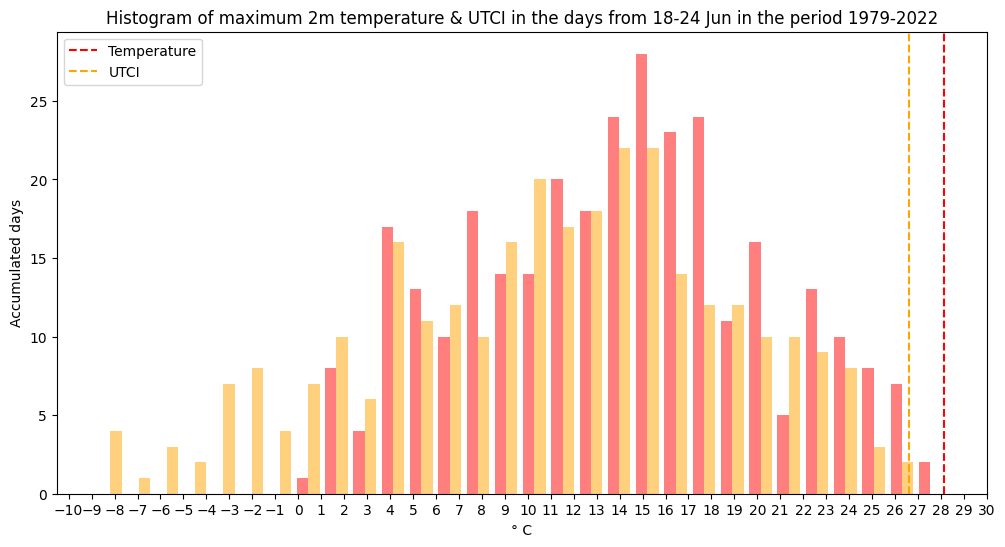

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.hist([mx2t_7days, utci_7days], bins = 30, color=['red', 'orange'], alpha = 0.5)
ax.set_title('Histogram of maximum 2m temperature & UTCI in the days from 18-24 Jun in the period 1979-2022')
ax.set_xticks(np.arange(-10,31,1))
ax.set_ylabel('Accumulated days')
ax.set_xlabel('° C')
plt.axvline(x = my_mx2t_2020['mx2t'].max(), color = 'red', label = 'Temperature', linestyle='--')
plt.axvline(x = my_utci_2020.max(), color = 'orange', label = 'UTCI', linestyle='--')
ax.legend()

**Fig.4**
*The plot shows the distribution of history value of UTCI and the temperature from 18-24th (+-3 days from the hottest day of the heatwave) June of 1979-2020. The UTCI distribution is more spred-out than the temperature with some values below zero. It is proababily due to the UTCI is a function of temperature, RH and wind speed, resulting more various ouputs. The dashed lines indicate the maximum UTCI/temperaure during the heatwave event -- in both UTCI and temperaure, the maximum value is still at the far right end of the distribution. It can be reffered that it was really an extreme case for both indices.*

Level 2: Calculate any other index for the library and repeat HW1.

In [174]:
my_DI = models.discomfort_index(t, rh)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
t[1260:1290]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'mx2t' (time: 30)>
array([13.137909, 16.67752 , 19.735382, 21.942474, 21.70523 ,  8.805908,
        8.032806, 10.887421,  6.079132,  6.634491, 15.768219, 11.927277,
       13.539398, 14.440155, 13.732513, 13.619476, 19.888641, 22.472229,
       24.501984, 25.760315, 26.396942, 25.16983 , 25.281769, 19.070587,
       23.103302, 25.071747, 24.42212 , 23.241302, 12.919159, 19.482452],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-01 2021-06-02 ... 2021-06-30
    lon      float64 130.0
    lat      float64 67.5

In [176]:
#filter 2020 June HI
my_DI_2020 = my_DI['di'][1230:1260]
print(my_DI_2020)

[10.9 11.7 10.8  8.1 12.9 15.7 17.2 17.7 14.3  5.4 12.4 14.5 14.9 17.8
 16.2 17.5 18.9 19.9 20.7 22.7 23.1 22.2 22.3 22.2 21.9 21.8 22.  21.9
 19.  20.5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
#filter 2020 June HI
my_DI_discribe_2020 = my_DI['discomfort_condition'][1230:1260]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
for i, text in enumerate(my_DI_discribe_2020):
    if text == "No discomfort":
        my_DI_discribe_2020[i] = "●"
    elif text == "Less than 50% feels discomfort":
        my_DI_discribe_2020[i] = "▲"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
np.where(my_DI_discribe_2020 == "●")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 28, 29]),)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(<xarray.DataArray 'time' ()>
array('2020-06-06T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-06-06
    lon      float64 130.0
    lat      float64 67.5, 27, '● = No discomfort, ▲ = Less than 50% feels discomfort')

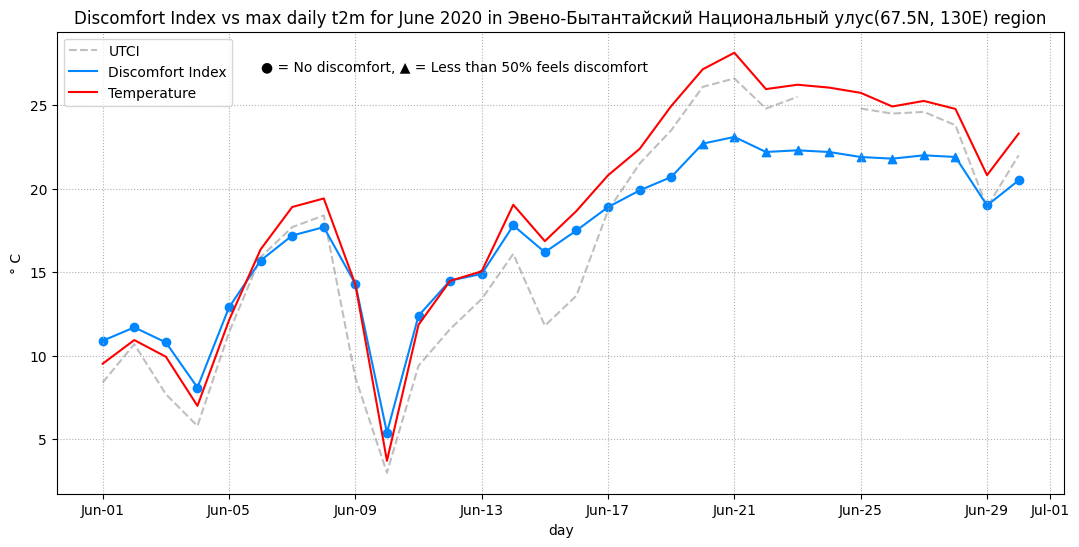

In [272]:
#a line plot that shows discomfort_index fluctuation in June, 2002
fig, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.plot(my_mx2t_2020.time, my_utci_2020, color = "grey", label='UTCI', ls='--', alpha = 0.5)
ax.plot(my_mx2t_2020.time, my_DI_2020, color = "#0086FF", label='Discomfort Index')
ax.scatter(my_mx2t_2020.time[np.where(my_DI_discribe_2020 == "●")], my_DI_2020[np.where(my_DI_discribe_2020 == "●")], color = "#0086FF")
ax.scatter(my_mx2t_2020.time[np.where(my_DI_discribe_2020 == "▲")], my_DI_2020[np.where(my_DI_discribe_2020 == "▲")], color = "#0086FF", marker='^')
ax.plot(my_mx2t_2020.time, my_mx2t_2020['mx2t'], color = "red", label='Temperature')
ax.set_title('Discomfort Index vs max daily t2m for June 2020 in Эвено-Бытантайский Национальный улус(67.5N, 130E) region')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='dotted')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left')
ax.annotate("● = No discomfort, ▲ = Less than 50% feels discomfort",xy=(my_mx2t_2020.time[5],27))

In [259]:
#select DI before 2020(included)
DI_past = my_DI['di'][0:1260]
print(DI_past)

[ 5.4  2.2  4.6 ... 21.9 19.  20.5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
DI_past_new = xr.DataArray(
    data=DI_past,
    dims=["time"],
    coords=dict(
        time = utci_past.time.values
    )
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
DI_past_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray (time: 1260)>
array([ 5.4,  2.2,  4.6, ..., 21.9, 19. , 20.5], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2020-06-30

In [262]:
#select 10, 50, 90 quantile from the past
DI_max_mid = DI_past_new.groupby('time.day').quantile(0.5)
DI_max_90  = DI_past_new.groupby('time.day').quantile(0.9)
DI_max_10  = DI_past_new.groupby('time.day').quantile(0.1)
print(DI_max_10)
print(DI_max_mid)
print(DI_max_90)

<xarray.DataArray (day: 30)>
array([ 4.33000016,  2.93000009,  3.79000003,  4.30999985,  5.21999984,
        4.18999991,  4.78999982,  5.31000018,  5.13999991,  6.25999985,
        6.29999981,  3.34000001,  7.62999992,  6.82000017,  6.62999992,
        8.34000015,  9.51000004,  7.78999987,  6.41000009,  6.25999985,
        6.32000017,  5.65999999,  6.02000008,  8.27999983,  8.44999962,
        8.33000021,  8.82000017, 10.00999966,  8.22000036, 10.40999966])
Coordinates:
    quantile  float64 0.1
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray (day: 30)>
array([ 9.55000019,  9.5       , 10.5       ,  9.75      , 10.        ,
       11.        , 10.69999981, 11.54999971, 12.0999999 , 11.9000001 ,
       12.19999981, 13.69999981, 13.5999999 , 13.4000001 , 13.3499999 ,
       13.80000019, 14.75      , 14.80000019, 14.75      , 14.        ,
       14.1500001 , 13.25      , 12.8499999 , 14.3499999 , 13.70000029,
       13.95000029, 14.550000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this wil

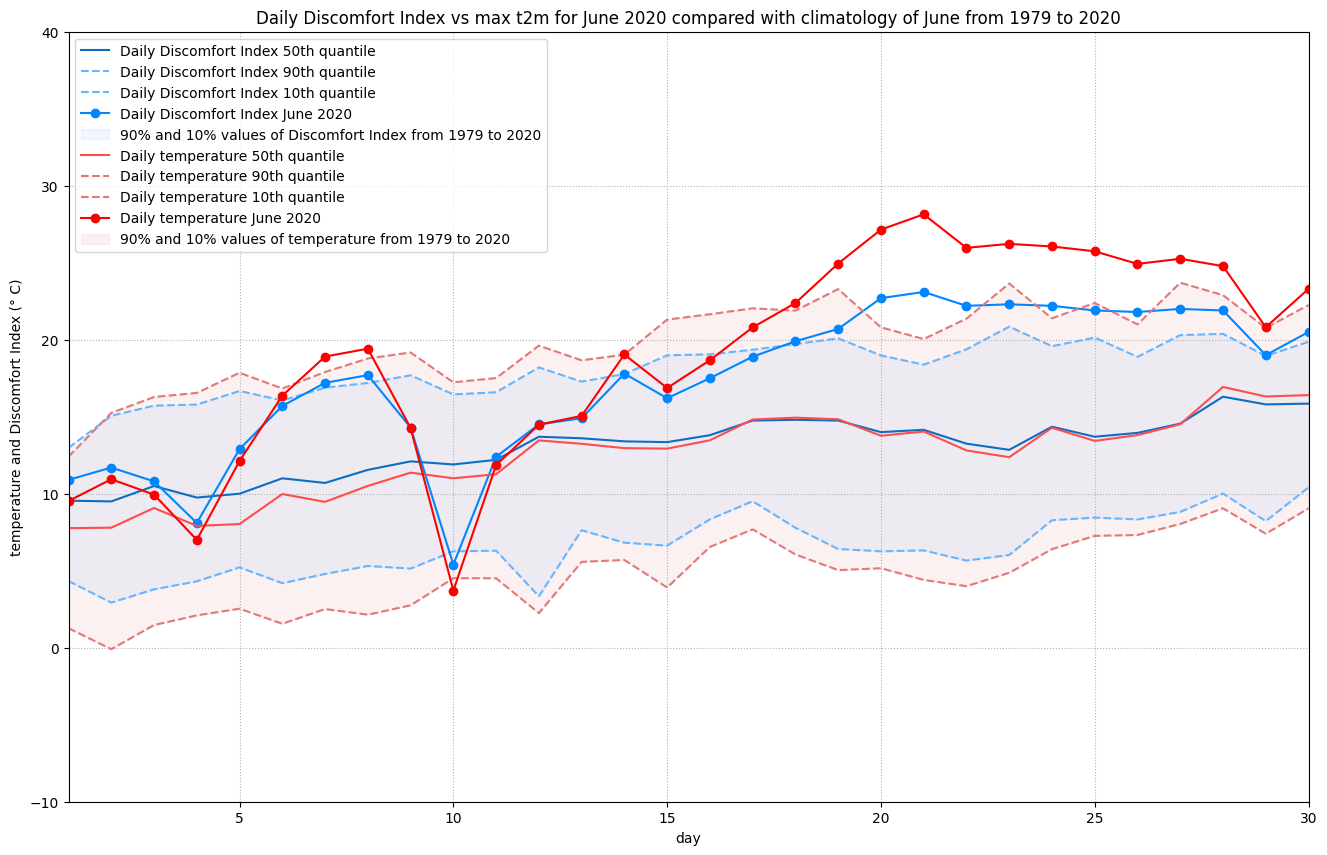

In [280]:
fig = plt.figure(figsize=(16,10))
ax = plt.subplot()

ax.plot(my_mx2t_2020.time.dt.day, DI_max_mid, color='#0D6DC4', label='Daily Discomfort Index 50th quantile')
ax.plot(my_mx2t_2020.time.dt.day, DI_max_90, color='#66B6FF', ls='--', label='Daily Discomfort Index 90th quantile')
ax.plot(my_mx2t_2020.time.dt.day, DI_max_10, color='#66B6FF', ls='--', label='Daily Discomfort Index 10th quantile')
ax.plot(my_mx2t_2020.time.dt.day, my_DI_2020, 'bo-', color='#0086FF', label='Daily Discomfort Index June 2020')
ax.fill_between(my_mx2t_2020.time.dt.day, DI_max_90, DI_max_10, alpha=0.1,
                label='90% and 10% values of Discomfort Index from 1979 to 2020', color = '#66B6FF')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_mid, color='#FF4D4D', label='Daily temperature 50th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_90, color='#E37878', ls='--', label='Daily temperature 90th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_10, color='#E37878', ls='--', label='Daily temperature 10th quantile')
ax.plot(my_mx2t_2020.time.dt.day, my_mx2t_2020['mx2t'], 'bo-', color='red', label='Daily temperature June 2020')
ax.fill_between(my_mx2t_2020.time.dt.day, mx2t_max_90, mx2t_max_10, alpha=0.1,
                label='90% and 10% values of temperature from 1979 to 2020', color = '#E37878')
ax.set_xlim(1,30)
ax.set_ylim(-10,40)
ax.set_title('Daily Discomfort Index vs max t2m for June 2020 compared with climatology of June from 1979 to 2020')
ax.set_ylabel('temperature and Discomfort Index (° C)')
ax.set_xlabel('day')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='dotted')